# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a single image, and later apply the result to a video stream (really just a series of images).  Watch the video clip "lane-finding-example.mp4" (also contained in this repository) to see what the output should look like.

Let's have a look at our first image called 'solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to bring up an interactive matplotlib window displaying the image.

**Note:** you can zoom in and explore the image within the interactive matplotlib window.  If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 10)


This image is:  <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


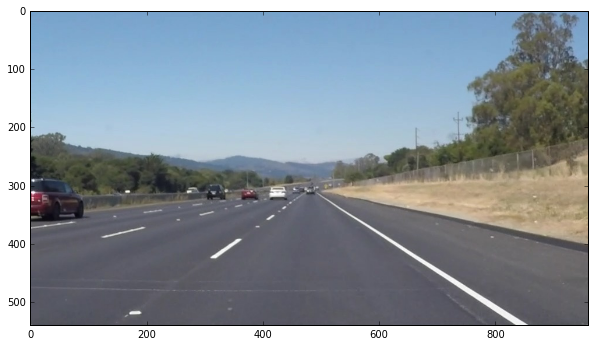

In [2]:
#reading in an image
image = mpimg.imread('solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is: ',type(image), 'with dimesions:', image.shape)
plt.imshow(image)
#the next two lines ensure that the plot window comes out on top of the browser
# fig = plt.gcf()
# fig.canvas.manager.window.raise_()

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the lines in the image, and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="laneLines_thirdPass.jpg" width="480" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look more or less like this after line detection </p> 
 </figcaption>
</figure>

---

**Below, we have defined some functions that you might find useful for this project.  These are using the OpenCV functions you learned about in the lesson, plus a few more.  These are meant to give you a good start in the right direction, but feel free to tweak, rewrite and modify as needed.  Also feel free to explore and find other tools, within OpenCV or elsewhere, to improve your lane finding pipeline**

In [3]:
def blank(image):
    #simply return an empty array the same size as image
    return np.zeros(image.shape, np.uint8)

def regionOfInterest(img, vertices):
    
    #defining a blank mask to start with
    mask = blank(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,)*channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def colorSelect(image, white_low, white_high):
    
    #defining a lower and upper bound for color (white_low and white_high are [R,G,B] vectors)
    lower_white = np.array(white_low, dtype=np.uint8) 
    upper_white = np.array(white_high, dtype=np.uint8)
        
    #returning a binary image, with white pixels represent where the color criteria were met
    selected = cv2.inRange(image, lower_white, upper_white)
    return selected

def houghLinesP(imageCopy, cselected, rho, theta, threshold, minLineLength, maxLineGap):
    
    #using Hough Transform to identify line segments in an image based on input parameters
    lines = cv2.HoughLinesP(cselected, rho, theta, threshold, np.array([]),
                            minLineLength, maxLineGap)
    
    #drawing the line segments discovered by Hough on the image
    drawLane(imageCopy, lines)
    return lines, imageCopy

def drawLane(image, lines):
    
    #stepping through all line segments identified by houghLinesP() and drawing them on the image
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                 cv2.line(image,(x1,y1),(x2,y2),(200,0,0),2)

---

**Below are some examples of how to use the functions defined above.  These are just examples, but using similar steps and adjusting parameters you can build your pipeline.**

---

In [2]:
yellow_line_img = mpimg.imread('./solidYellowLeft.jpg')

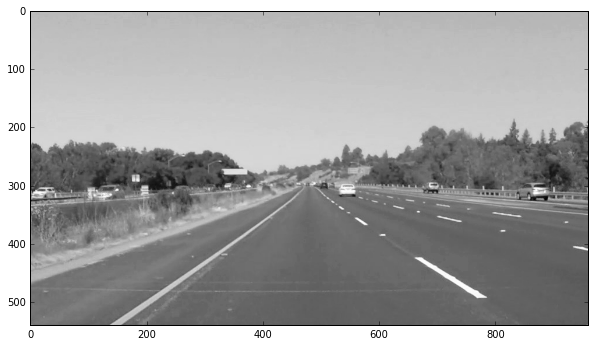

In [6]:
gray = cv2.cvtColor(yellow_line_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='Greys_r')

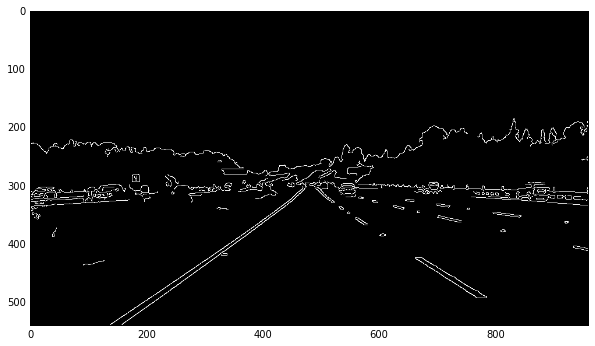

In [35]:

edges = cv2.Canny(gray_noise, 50, 150)
plt.imshow(edges, cmap='Greys_r')

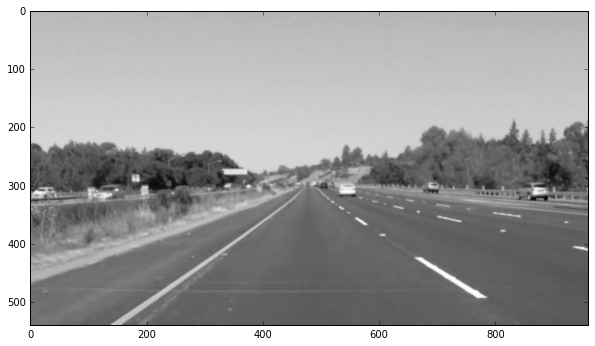

In [18]:
gray_noise = cv2.GaussianBlur(gray,(5, 5), 0)
plt.imshow(gray_noise, cmap='Greys_r')

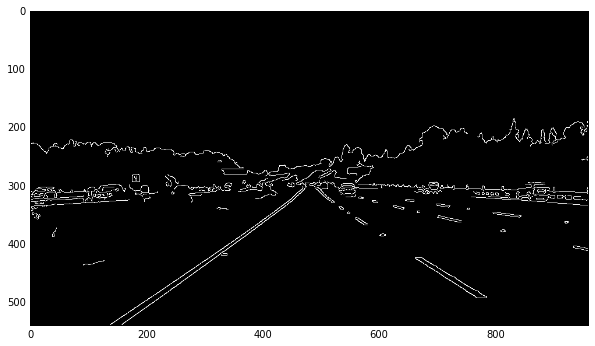

In [203]:
edges_noise = cv2.Canny(gray_noise, 50, 150)
plt.imshow(edges_noise, cmap='Greys_r')

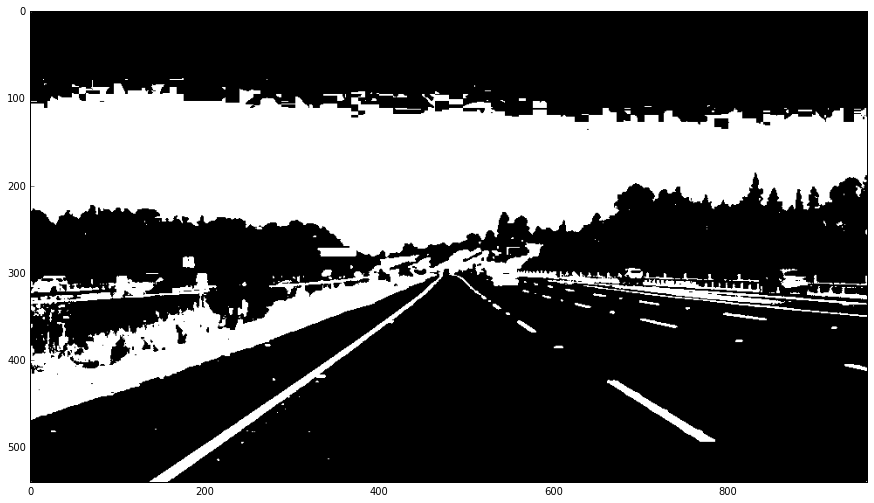

In [73]:
#doing a color selection
lowWhiteThreshold = [128, 128, 0]
highWhiteThreshold = [255, 255, 255]
cselect = colorSelect(yellow_line_img, lowWhiteThreshold, highWhiteThreshold)
plt.imshow(cselect, cmap='Greys_r')

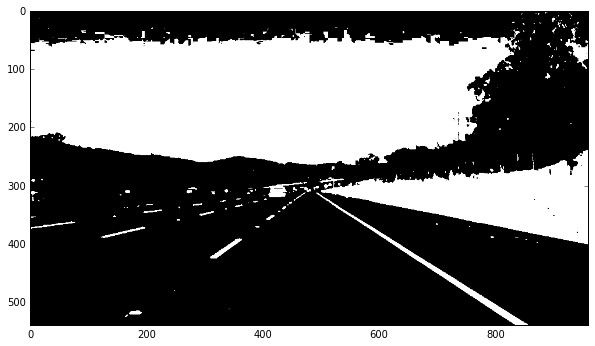

In [4]:
#doing a color selection
lowWhiteThreshold = [128, 128, 0]
highWhiteThreshold = [255, 255, 255]
cselect = colorSelect(image, lowWhiteThreshold, highWhiteThreshold)
plt.imshow(cselect, cmap='Greys_r')

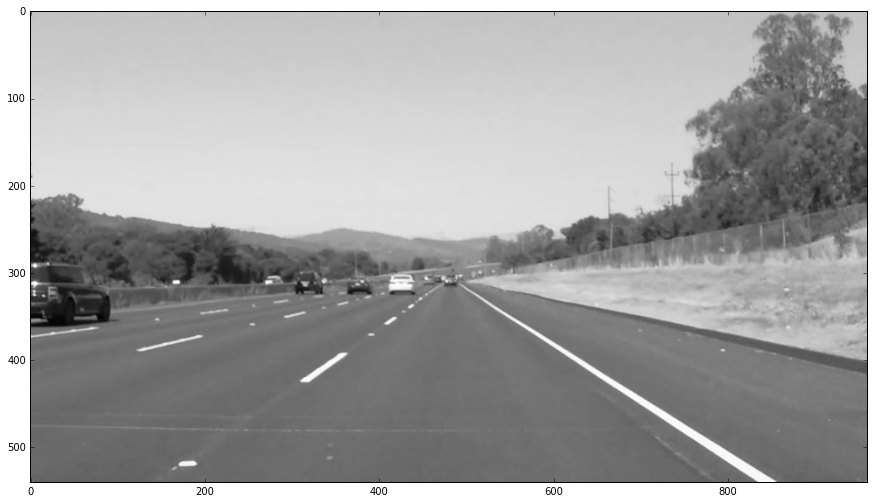

In [75]:
#grayscaling
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='Greys_r')

In [1]:
#a region of interest selection
vertices = np.array([[(120,539),(460,315), (500, 317), (880,539)]], dtype=np.int32)
masked = regionOfInterest(cselect, vertices)
plt.imshow(masked, cmap='Greys_r')

NameError: name 'np' is not defined

In [ ]:
#Hough Transform to find lines then drawing them onto the original image
rho = 1
theta = np.radians(280)
threshold = 10
minLineLength = 1
maxLineGap = 200
lines, lineImage = houghLinesP(blank(image), edges_noise, rho, theta, threshold, minLineLength, maxLineGap)
colorEdges = np.dstack((edges_noise, edges_noise, edges_noise)) 
combo = cv2.addWeighted(colorEdges, 0.8, lineImage, 1, 0)
plt.imshow(combo, cmap='Greys_r')

**Check out the OpenCV documentation to discover even more awesome functionality!**

**You can run the cell below to watch the video.  Once you have a working pipeline, paste your code into the loop below and see how you did!**

In [222]:
#Run this cell without changing anything first to watch the video
cv2.startWindowThread()
cv2.namedWindow('Lane-Finding')
cap = cv2.VideoCapture('solidWhiteRight.mp4')

while cap.isOpened():

    ret, image = cap.read()
    if image is not None:
        #### ADD YOUR CODE HERE #############
        # These are the tools you have from the lesson:#
        # 1) Color selection
        # 2) Mask the region of interest in the image
        # 3) Apply Canny Edge Detection
        # 4) Apply Hough Transform to find lines
        # These methods should be enough to do the job, 
        # but there are other methods out there,
        # feel free to explore and experiment!
        ####################################
        ggray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurGray = cv2.GaussianBlur(ggray,(5, 5),0)
        blurEdges = cv2.Canny(blurGray, 50, 150)
        maskedRegion = regionOfInterest(blurEdges, vertices)
        lines, lineImage = houghLinesP(blank(image), maskedRegion, rho, theta, threshold, minLineLength, maxLineGap)
        result = cv2.addWeighted(image, 0.8, lineImage, 1, 0)
        cv2.imshow('Lane-Finding', result)
    else:
        break
        
    k = cv2.waitKey(30) & 0xff
    if k == 27 :
        break

cap.release()
cv2.destroyAllWindows()

**Now try it again with a new video...  does your algorithm still work?  Or do you need to modify it?**

---

<figure>
 <img src="solidYellowLeft.jpg" width="480" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Now the scenario looks like this! </p> 
 </figcaption>
</figure>

---


In [201]:
#
cv2.startWindowThread()
cv2.namedWindow('Lane-Finding')
cap = cv2.VideoCapture('solidYellowLeft.mp4')

while cap.isOpened():

    ret, image = cap.read()
    if image is not None:
        
        #### ADD YOUR CODE HERE #############
        # These are the tools you have from the lesson:#
        # 1) Color selection
        # 2) Mask the region of interest in the image
        # 3) Apply Canny Edge Detection
        # 4) Apply Hough Transform to find lines
        # These methods should be enough to do the job, 
        # but there are other methods out there,
        # feel free to explore and experiment!
        ####################################
#         cselect = colorSelect(image, lowWhiteThreshold, highWhiteThreshold)
        
        ggray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurGray = cv2.GaussianBlur(ggray,(5, 5),0)
        blurEdges = cv2.Canny(blurGray, 50, 150)
        maskedRegion = regionOfInterest(blurEdges, vertices)
        lines, lineImage = houghLinesP(blank(image), maskedRegion, rho, theta, threshold, minLineLength, maxLineGap)
        result = cv2.addWeighted(image, 0.8, lineImage, 1, 0)
        cv2.imshow('Lane-Finding', result)
    else:
        break
        
    k = cv2.waitKey(30) & 0xff
    if k == 27 :
        break

cap.release()
cv2.destroyAllWindows()